
# Importing libraries



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.svm import SVC

import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Datasets

In [3]:
df=pd.read_csv('/content/drive/My Drive/CSV/hemorrhage_diagnosis.csv')
print(df.shape)
print("Successfully imported data into console" )  
df.head(10)

(2501, 9)
Successfully imported data into console


,PatientNumber,SliceNumber,Intraventricular,Intraparenchymal,Subarachnoid,Epidural,Subdural,No_Hemorrhage,Fracture_Yes_No
0,49,1,0,0,0,0,0,1,0
1,49,2,0,0,0,0,0,1,0
2,49,3,0,0,0,0,0,1,0
3,49,4,0,0,0,0,0,1,0
4,49,5,0,0,0,0,0,1,0
5,49,6,0,0,0,0,0,1,0
6,49,7,0,0,0,0,0,1,0
7,49,8,0,0,0,0,0,1,0
8,49,9,0,0,0,0,0,1,0
9,49,10,0,0,0,0,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   PatientNumber     2501 non-null   int64
 1   SliceNumber       2501 non-null   int64
 2   Intraventricular  2501 non-null   int64
 3   Intraparenchymal  2501 non-null   int64
 4   Subarachnoid      2501 non-null   int64
 5   Epidural          2501 non-null   int64
 6   Subdural          2501 non-null   int64
 7   No_Hemorrhage     2501 non-null   int64
 8   Fracture_Yes_No   2501 non-null   int64
dtypes: int64(9)
memory usage: 176.0 KB


# Plotting the graphs

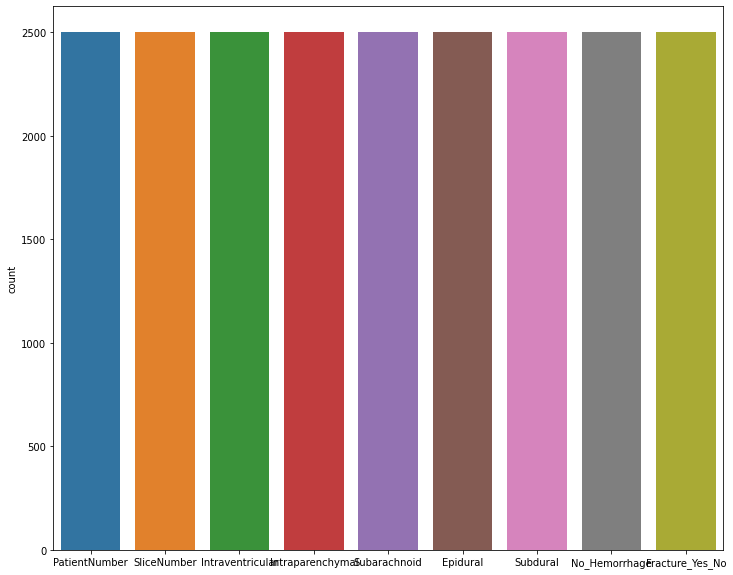

In [11]:
sns.countplot(data=df)
plt.rcParams['figure.figsize']=(20.0,25.0)

Plotting the grapgh for people having hameorarge or not

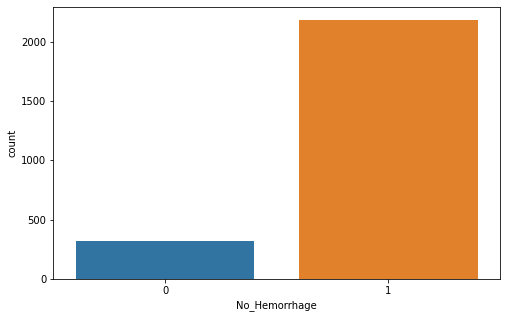

In [13]:
sns.countplot(x='No_Hemorrhage',data=df)
plt.rcParams['figure.figsize']=(5.0,5.0)

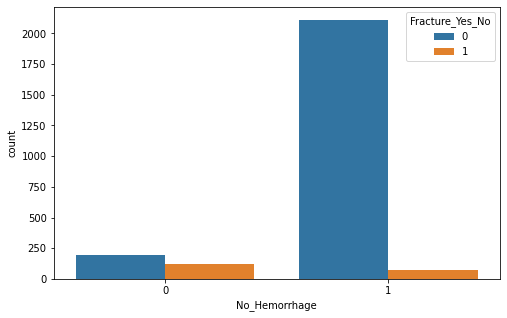

In [7]:
sns.countplot(x='No_Hemorrhage',hue='Fracture_Yes_No',data=df)
plt.rcParams['figure.figsize']=(10.0,5.0)

# Data Wrangling 
finding out the missing values

In [8]:
df.isnull() # will give the null value

,PatientNumber,SliceNumber,Intraventricular,Intraparenchymal,Subarachnoid,Epidural,Subdural,No_Hemorrhage,Fracture_Yes_No
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2496,False,False,False,False,False,False,False,False,False
2497,False,False,False,False,False,False,False,False,False
2498,False,False,False,False,False,False,False,False,False
2499,False,False,False,False,False,False,False,False,False


No null values are found so we'll wont remove anything 

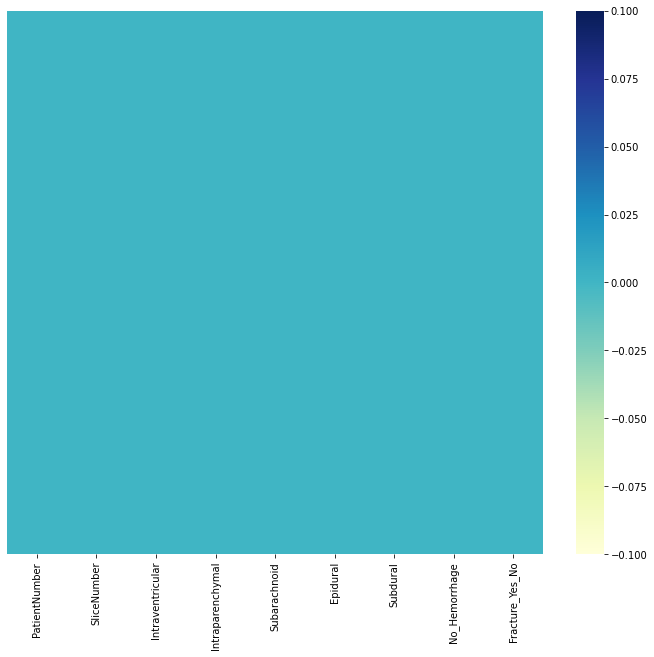

In [9]:
plt.rcParams['figure.figsize']=(12.0,10.0)
sns.heatmap(df.isnull(),yticklabels=False,cmap="YlGnBu")

# Training and testing algorithim

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
 
x = df.drop('No_Hemorrhage', axis=1)
y = df['No_Hemorrhage']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
 
predictions = logmodel.predict(x_test)
print('Classification Report')

print(classification_report(y_test, predictions))
print('Confusion Matrix')

print(confusion_matrix(y_test, predictions))
print('\n Accuracy Report')
print(accuracy_score(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       101
           1       1.00      1.00      1.00       725

    accuracy                           1.00       826
   macro avg       1.00      0.99      0.99       826
weighted avg       1.00      1.00      1.00       826

Confusion Matrix
[[ 98   3]
 [  0 725]]

 Accuracy Report
0.9963680387409201


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
